In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.applications.resnet import ResNet50
from keras.applications.resnet import preprocess_input

In [2]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [3]:
from tensorflow.python.client import device_lib

print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 2924544670530107057
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 2918357403
locality {
  bus_id: 1
  links {
  }
}
incarnation: 7897951329394039846
physical_device_desc: "device: 0, name: GeForce GTX 1050, pci bus id: 0000:01:00.0, compute capability: 6.1"
]


In [4]:
print(tf.test.gpu_device_name())

/device:GPU:0


In [5]:
tf.test.is_gpu_available(
  cuda_only=False, min_cuda_compute_capability=None
)

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [6]:
model = ResNet50()
# summarize the model
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [7]:
from keras.models import Model

model = Model(inputs=model.inputs , outputs=model.layers[-2].output)

In [8]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

conv5_block3_1_conv (Conv2D)    (None, 7, 7, 512)    1049088     conv5_block2_out[0][0]           
__________________________________________________________________________________________________
conv5_block3_1_bn (BatchNormali (None, 7, 7, 512)    2048        conv5_block3_1_conv[0][0]        
__________________________________________________________________________________________________
conv5_block3_1_relu (Activation (None, 7, 7, 512)    0           conv5_block3_1_bn[0][0]          
__________________________________________________________________________________________________
conv5_block3_2_conv (Conv2D)    (None, 7, 7, 512)    2359808     conv5_block3_1_relu[0][0]        
__________________________________________________________________________________________________
conv5_block3_2_bn (BatchNormali (None, 7, 7, 512)    2048        conv5_block3_2_conv[0][0]        
__________________________________________________________________________________________________
conv5_bloc

In [9]:
import random

INPUT_MODEL_SHAPE = (224,224)

def make_feature_of_video(vidcap):
    feature = []
    
    rands = random.sample(range(1, int(vidcap.get(cv2.CAP_PROP_FRAME_COUNT)) - 1), 20)
    rands.sort()

    for rand in rands:
        vidcap.set(1, rand)
        a = vidcap.read()[1].astype(np.uint8)
        a = cv2.resize(a, INPUT_MODEL_SHAPE, interpolation = cv2.INTER_AREA)
        a = a.reshape((1, a.shape[0], a.shape[1], a.shape[2]))
        image = preprocess_input(a)
        feature.append(model.predict([image]))
        
    feature = np.array(feature)
    feature = np.reshape(feature, (20 , 2048)).T
    return feature

In [10]:
import glob
import cv2

yes_fileNames = glob.glob("hockey_dataset/HockeyFights/*.avi")
no_fileNames = glob.glob("hockey_dataset/HockeyFights_no/*.avi")
# print(no_fileNames[12])

yes_features = []
no_features = []

c = 0 

for file_name in yes_fileNames:
    if c % 10 == 0 :
        print("C = " , c)
    c+=1
    vidcap = cv2.VideoCapture(file_name)
    yes_features.append(make_feature_of_video(vidcap)) 

yes_features = np.array(yes_features)
    
c = 0 

for file_name in no_fileNames:
    if c % 10 == 0 :
        print("C = " , c)
    c+=1
    vidcap = cv2.VideoCapture(file_name)
    no_features.append(make_feature_of_video(vidcap)) 
    
no_features = np.array(no_features)    
    

no_features.shape

C =  0
C =  10
C =  20
C =  30
C =  40
C =  50
C =  60
C =  70
C =  80
C =  90
C =  100
C =  110
C =  120
C =  130
C =  140
C =  150
C =  160
C =  170
C =  180
C =  190
C =  200
C =  210
C =  220
C =  230
C =  240
C =  250
C =  260
C =  270
C =  280
C =  290
C =  300
C =  310
C =  320
C =  330
C =  340
C =  350
C =  360
C =  370
C =  380
C =  390
C =  400
C =  410
C =  420
C =  430
C =  440
C =  450
C =  460
C =  470
C =  480
C =  490
C =  0
C =  10
C =  20
C =  30
C =  40
C =  50
C =  60
C =  70
C =  80
C =  90
C =  100
C =  110
C =  120
C =  130
C =  140
C =  150
C =  160
C =  170
C =  180
C =  190
C =  200
C =  210
C =  220
C =  230
C =  240
C =  250
C =  260
C =  270
C =  280
C =  290
C =  300
C =  310
C =  320
C =  330
C =  340
C =  350
C =  360
C =  370
C =  380
C =  390
C =  400
C =  410
C =  420
C =  430
C =  440
C =  450
C =  460
C =  470
C =  480
C =  490


(500, 2048, 20)

In [11]:
yes_features.shape

no_features.shape

(500, 2048, 20)

In [12]:
np.save('yes_features.npy', yes_features)
np.save('no_features.npy', no_features)

In [13]:
yes_features1 = np.load('yes_features.npy')
no_features1 = np.load('no_features.npy')

# no_features1 == no_features

yes_features1.shape
no_features1.shape


(500, 2048, 20)

# use feature vectors to create model 

In [16]:
X = np.vstack((yes_features1 , no_features1))
X.shape

(1000, 2048, 20)

In [20]:
Y = np.vstack((np.ones((500,1)) ,np.zeros((500,1)) ))
Y.shape

(1000, 1)

In [23]:
from sklearn.model_selection import train_test_split

TEST_RATIO = 1/6
TRAIN_RATIO = 4/5
VALIDATION_RATIO = 1/5


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=TEST_RATIO)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=VALIDATION_RATIO)

In [28]:
EarlyStopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [45]:
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(2048, 20)))  # image size

model.add(tf.keras.layers.Conv1D(1,3,strides=1, activation="relu"))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(512,activation="sigmoid"))
model.add(tf.keras.layers.Dense(256,activation="relu"))
model.add(tf.keras.layers.Dense(2,activation="softmax"))

In [46]:

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 2046, 1)           61        
_________________________________________________________________
flatten (Flatten)            (None, 2046)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               1048064   
_________________________________________________________________
dense_7 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 514       
Total params: 1,179,967
Trainable params: 1,179,967
Non-trainable params: 0
_________________________________________________________________


In [51]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc' , 'accuracy' ])

In [52]:
history = model.fit( X_train, y_train , validation_data=(X_val ,y_val), epochs = 5000 , callbacks=[EarlyStopping] , batch_size=30)

Epoch 1/5000
23/23 [==============================] - 2s 25ms/step - loss: 0.5766 - acc: 0.6907 - accuracy: 0.6907 - val_loss: 0.2232 - val_acc: 0.9102 - val_accuracy: 0.9102
Epoch 2/5000
23/23 [==============================] - 0s 11ms/step - loss: 0.2092 - acc: 0.9249 - accuracy: 0.9249 - val_loss: 0.2062 - val_acc: 0.9162 - val_accuracy: 0.9162
Epoch 3/5000
23/23 [==============================] - 0s 10ms/step - loss: 0.1401 - acc: 0.9535 - accuracy: 0.9535 - val_loss: 0.1613 - val_acc: 0.9641 - val_accuracy: 0.9641
Epoch 4/5000
23/23 [==============================] - 0s 10ms/step - loss: 0.0871 - acc: 0.9700 - accuracy: 0.9700 - val_loss: 0.1759 - val_acc: 0.9581 - val_accuracy: 0.9581
Epoch 5/5000
23/23 [==============================] - 0s 10ms/step - loss: 0.0487 - acc: 0.9865 - accuracy: 0.9865 - val_loss: 0.1379 - val_acc: 0.9521 - val_accuracy: 0.9521
Epoch 6/5000
23/23 [==============================] - 0s 10ms/step - loss: 0.0255 - acc: 0.9895 - accuracy: 0.9895 - val_loss

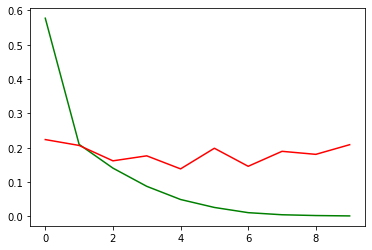

In [53]:
import matplotlib.pyplot as plt


plt.plot(history.history['loss'] , color = 'green')
plt.plot(history.history['val_loss'] , color = 'red')

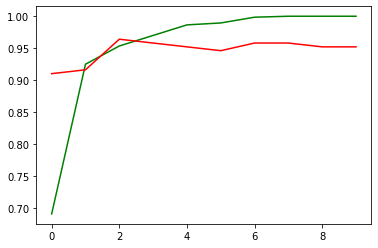

In [54]:
plt.plot(history.history['accuracy'] , color = 'green')
plt.plot(history.history['val_accuracy'] , color = 'red')